# Data Importing


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 4K_House_Rent_Dataset.csv to 4K_House_Rent_Dataset.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
import io

# Reading and Manipulating Data

In [ ]:
data = pd.read_csv("4K_House_Rent_Dataset.csv")
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
y = data['Rent'].values
x1 = data['Size'].values
x2 = data['BHK'].values
x3 = data['Bathroom'].values
x4 = data["Furnishing Status"].replace({"Unfurnished": 0, "Semi-Furnished": 1, "Furnished": 2}).values

In [ ]:
t0 = 0
t1 = 0
t2 = 0
t3 = 0
t4 = 0

# Gradient Descent 

In [ ]:
m = len(x1)
epoch = 1000
learning_rate = 0.0000001

In [ ]:
for i in range(epoch):
    c0 = 0
    c1 = 0
    c2 = 0
    c3 = 0
    c4 = 0
    
    for j in range(m):
        c0 += (t0 + t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j])
        c1 += (t0 + t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]) * x1[j]
        c2 += (t0 + t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]) * x2[j]
        c3 += (t0 + t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]) * x3[j]
        c4 += (t0 + t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]) * x4[j]
        
    t0 = t0 - learning_rate * (c0) / m
    t1 = t1 - learning_rate * (c1) / m
    t2 = t2 - learning_rate * (c2) / m
    t3 = t3 - learning_rate * (c3) / m
    t4 = t4 - learning_rate * (c4) / m
  
print(t0,t1,t2,t3,t4)

-0.3998476467252764 40.60456150073871 0.0465224868228666 0.5873033664176552 0.1753278616268883


In [ ]:
sum = 0
for j in range(m):
    tsum = t0 +  t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]
    tsum = tsum * tsum
    sum = sum + tsum
    
cost = sum/(2*m)
print(cost)

2558741756.3962893


In [ ]:
predict = t0 + t1*1100 + t2*2 + t3*2 + t4*1
print(predict)

44666.06078273396


# Plotting

4746 4746


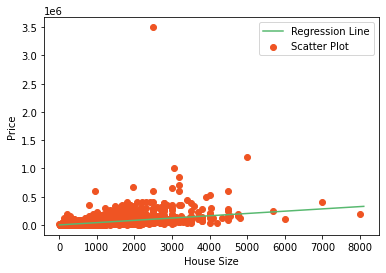

In [ ]:
max_x = np.max(x1) + 100
min_x = np.min(x1)
x = np.linspace(min_x, max_x, 1000)
yy = t1 * x + t0
print(len(x1),len(y))
plt.plot(x, yy, color='#58b970', label='Regression Line')
plt.scatter(x1, y, c = "#ef5423", label = 'Scatter Plot')


plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()